In [1]:
!pip install emoji

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re

[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aditya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('spam.csv') #write your own file path
df.head()



,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape


(5572, 2)

In [5]:
#check null values
print(df.isnull().sum())
print(df.isna().sum())

Category    0
Message     0
dtype: int64
Category    0
Message     0
dtype: int64


In [6]:
#find duplicates and drop (inplace=True)
df = df.drop_duplicates()

In [7]:
#now it should be false
df.duplicated().any()


np.False_

<class 'pandas.core.series.Series'>


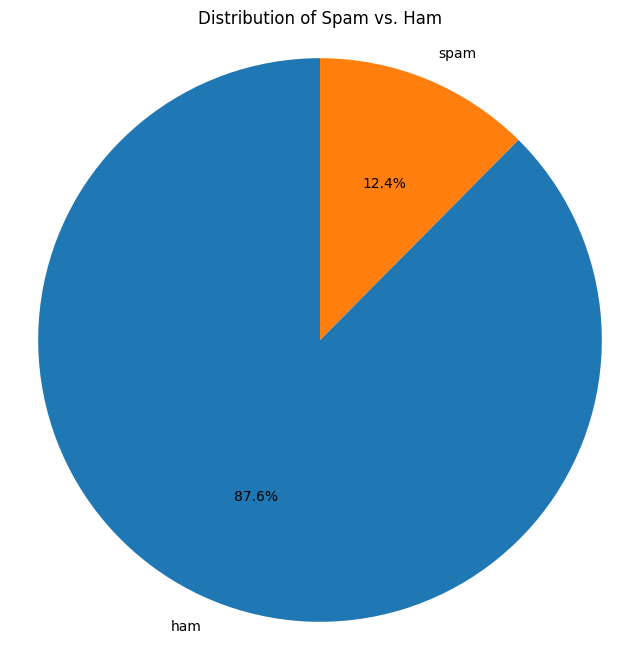

In [8]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()
print(type(category_counts))
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#TEXT VISUALIZATION

- Iterate through unique categories: This loop iterates through each unique category in the 'Category' column of the DataFrame df.¶
- Filter the DataFrame for the current category: Inside the loop, the code filters the DataFrame df to create a new DataFrame filtered_df containing only the rows where the 'Category' column matches the current category.
- Concatenate all text data for the current category: The code then concatenates all the text data from the 'Message' column of filtered_df into a single string variable named text.
- Generate word cloud: Using the concatenated text data (text), the code generates a word cloud using the WordCloud module. The word cloud is configured to have a width of 800 pixels, a height of 400 pixels, and a white background.
- Plot the word cloud: Finally, the code plots the generated word cloud using Matplotlib. Each word's size in the word cloud is proportional to its frequency in the concatenated text data. The title of each word cloud plot includes the current category being processed. The plt.axis('off') command is used to hide the axes of the plot.
This process repeats for each unique category, generating a separate word cloud for each category based on the text data associated with that category.

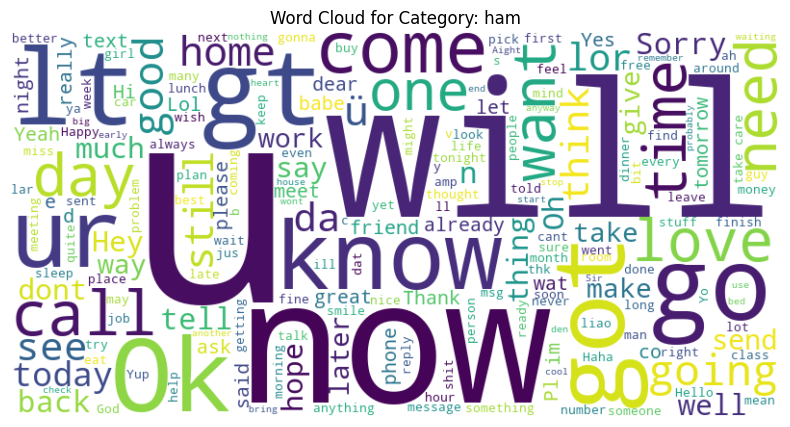

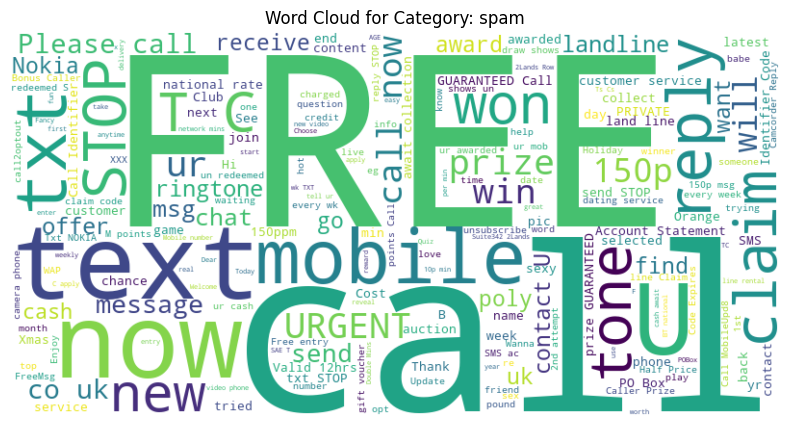

In [9]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [10]:
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#Text Preprocessing

1. Lower Casing¶
2. Remove Extra White Spaces
3. Remove HTML Tags
4. Remove URLs
5. Remove Punctuations
6. Remove Special Characters
7. Remove Numeric Values
8. Remove Non-alpha Numeric

10. Handling StopWords¶
11. Handling Emojis
12. Stemming



In [11]:
# Convert 'Text' column to lowercase
pd.set_option('display.max_colwidth', None)
df['Message_clean'] = df['Message'].str.lower()
df.head()


,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though"


In [12]:



# Remove extra white spaces from the 'Text' column
df['Message_clean'] = df['Message_clean'].str.strip()
df['Message_clean'] = df['Message_clean'].replace(r'\s+',' ',regex=True)
df.head()

,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though"


In [13]:
# Function to remove HTML tags from text
def remove_html_tags(text):
    return BeautifulSoup(text,'html.parser').get_text()

# Remove HTML tags from 'Text' column
df['Message_clean'] = df['Message_clean'].apply(remove_html_tags)
df.head()

,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though"


In [14]:


# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www.\S+','',text)

# Apply the function to the 'Text' column
df['Message_clean'] = df['Message_clean'].apply(remove_urls)
df.head()



,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
1,0,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3,0,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though"


In [15]:


def remove_special_characters(text):
    # Define the pattern to match special characters
    return re.sub(r'[^A-Za-z0-9\s]','',text)

# Apply the function to the 'Message' column
df['Message_clean'] = df['Message_clean'].apply(remove_special_characters)
df.head()


,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry questionstd txt ratetcs apply 08452810075over18s
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [16]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'[0-9]','',text)

# Apply the function to the "Message" column
df['Message_clean'] = df['Message_clean'].apply(remove_numeric)
df.head()

,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [17]:


# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-z0-9\s]','',text)

# Apply the function to the "Message" column
df['Message_clean'] = df['Message_clean'].apply(remove_non_alphanumeric)
df.head()

,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [18]:
# Define a dictionary of chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

In [19]:
df['Message_clean']

0                                   go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1                                                                                                                  ok lar joking wif u oni
2             free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs
3                                                                                              u dun say so early hor u c already then say
4                                                                              nah i dont think he goes to usf he lives around here though
                                                                       ...                                                                
5567    this is the nd time we have tried  contact u u have won the  pound prize  claim is easy call  now only p per minute btnationalrate
5568                       

In [20]:


# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    new_words = []

    for word in words:
        if word.upper() in chat_words:
            new_words.append(chat_words[word.upper()])
        else:
            new_words.append(word)
    return ' '.join(new_words)

# Apply replace_chat_words function to 'Text' column
df['Message_clean'] = df['Message_clean'].apply(replace_chat_words)
df.head()



,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,0,Ok lar... Joking wif u oni...,ok lar joking wif You oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs
3,0,U dun say so early hor... U c already then say...,You dun say so early hor You c already then say
4,0,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [21]:


# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message_clean'] = df['Message_clean'].apply(remove_stopwords)
df['Message_clean']



[nltk_data] Downloading package stopwords to C:\Users\Aditya
[nltk_data]     Singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                go jurong point crazy available bugis n great world la e buffet cine got amore wat
1                                                                                             ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3                                                                                   dun say early hor c already say
4                                                                       nah dont think goes usf lives around though
                                                           ...                                                     
5567                            nd Tears eyes tried contact pound prize claim easy call p per minute btnationalrate
5568                                                                                      b going esplanade fr home
5569                                                                    

In [22]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message_clean'] = df['Message_clean'].apply(remove_emojis)


In [23]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_clean'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))
df.head()


,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. avail onli in bugi n great world la e buffet... cine there got amor wat..."
1,0,Ok lar... Joking wif u oni...,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005. text fa to 87121 to receiv entri question(std txt rate)t&c' appli 08452810075over18'
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor... u c alreadi then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goe to usf, he live around here though"


In [24]:
#Convert text to numbers using bag of words
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Message_clean']).toarray()

y = df['Category'].values.reshape(-1,1)
print(y)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [25]:
print(np.unique(y, return_counts=True))



(array([0, 1]), array([4516,  641]))


In [26]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [27]:
df.head()

,Category,Message,Message_clean
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. avail onli in bugi n great world la e buffet... cine there got amor wat..."
1,0,Ok lar... Joking wif u oni...,ok lar... joke wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entri in 2 a wkli comp to win fa cup final tkt 21st may 2005. text fa to 87121 to receiv entri question(std txt rate)t&c' appli 08452810075over18'
3,0,U dun say so early hor... U c already then say...,u dun say so earli hor... u c alreadi then say...
4,0,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goe to usf, he live around here though"


#Solve this problem using Logistic Regression(using numpy from scratch)

In [28]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [29]:
def train_log_reg(X, y, lr=0.1, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n, 1))
    b = 0
    y = y.reshape(-1)

    for _ in range(epochs):
        z = np.dot(X, theta) + b
        y_hat = sigmoid(z).reshape(-1)         

        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = (1 / m) * np.sum(y_hat - y)

        theta -= lr * dw.reshape(-1,1)  
        b -= lr * db

    return theta, b


In [30]:
def predict(X, theta, b):
    y_hat = sigmoid(np.dot(X, theta).reshape(-1) + b)
    return (y_hat >= 0.5).astype(int)

In [31]:
theta, b = train_log_reg(X_train,y_train,lr=0.1,epochs=1000)
y_pred = predict(X_test,theta,b)

In [32]:
print(y_pred)
accuracy = np.mean(y_pred == y_test)
print('accuracy is:', accuracy*100, "%")

[0 0 0 ... 0 0 0]
accuracy is: 78.97211706027282 %


#Now Use sklearn library to fit the data using logistic regression and compare results